# Комментарий наставника

Привет! 

Все отлично! приступай к четвертому проекту!

Я добавил там комментарий около apply revenue_calc, обрати, пожалуйста, внимание.

## 0. Описание проекта

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.);
    - сообщение: 3 рубля;
    - 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль;
    - сообщение: 1 рубль;
    -  Гб интернет-трафика: 150 рублей.

## 1. Исходные данные и общая информация

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)

calls = pd.read_csv ('/datasets/calls.csv')
internet = pd.read_csv ('/datasets/internet.csv')
messages = pd.read_csv ('/datasets/messages.csv')
tariffs = pd.read_csv ('/datasets/tariffs.csv')
users = pd.read_csv ('/datasets/users.csv')

In [2]:
# выведем информацию о наборе данных
calls.info()
 
# и первые строки датасета
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [4]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## 2. Подготовка данных

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных.

Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.
Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

Преобразуем даты в наборах данных в соответствующий тип и добавим столбец с месяцем.

In [7]:
calls['month'] =  pd.to_datetime(calls['call_date'], format='%Y-%m-%d').dt.month
internet['month']=  pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month
messages['month'] =  pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month

Дальнешие операции с данными будем проводить в предположении, что длительность 0.0 минут не засчитывается за совершённый разговор (возможно, так по какой-то причине записались вызовы без ответа), значит в тарифе "Смарт" за такие звонки не будет вычитаться минута из ежемесячного пакета. Также будем считать, что объём трафика за сессию 0.0 Мб тоже не будет округляться до целого мегабайта. Удалим эти записи.

In [8]:
calls = calls.query('duration > 0').reset_index(drop = True)
internet = internet.query('mb_used > 0').reset_index(drop = True)

In [9]:
# создадим таблицу с 'user_id', соответствующим тарифом и городом
users_info = users[['user_id','tariff','city']]
users_info.head()

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


# Комментарий наставника
Я бы тоже так сделал. Самый просто способ добавить тариф к основной табличке

In [10]:
# добавим указание о тарифе в таблицы со звонками и интернет-сессиями
calls = calls.merge(users_info, on = 'user_id')
internet = internet.merge(users_info, on = 'user_id')

# Комментарий наставника
По этим функциям чуть ниже будет комментарий, а тут просто такой совет-придирка:

`
    if tariff == 'smart':
        mb_used = math.ceil(mb_used)
        return mb_used
    else:
        return mb_used     
`

можно превратить в 

`
    if tariff == 'smart':
        return math.ceil(mb_used)
    else:
        return mb_used     
`

Не то чтобы строчку жалко (их никогда не надо экономить и если выражения большие, то лучше как раз поступать так, как ты), но здесь не очень длинное выражение и, кажется, так просто читать легче

In [11]:
# создадим функцию для округления длительности звонка и объёма трафика до ближайшего целого вверх
# def duration_ceiling(row):
#     user_id = row['user_id']
#     duration = row['duration']
#     tariff = row['tariff']
#     if tariff == 'smart':
#         duration = math.ceil(duration)
#         return duration
#     else:
#         return duration        
#     
# def mb_ceiling(row):
#     user_id = row['user_id']
#     mb_used = row['mb_used']
#     tariff = row['tariff']
#     if tariff == 'smart':
#         mb_used = math.ceil(mb_used)
#         return mb_used
#     else:
#         return mb_used     

# Комментарий наставника
Слишком хитро... кажется, что все, что ты здесь делаешь, это округляешь вверх. Т.е как минимум `    user_id = row['user_id']` - лишнее.

Но мне кажется, что можно вообще сделать `calls.duration.apply(math.ceil)` но только для тех строк, где тариф соответствующий. Это можно через `loc` сделать.

In [12]:
# применим функцию к каждой строке 
# calls['duration'] = calls.apply(duration_ceiling, axis = 1)
# internet['mb_used'] = internet.apply(mb_ceiling, axis = 1)

In [13]:
# Пробовал так раньше, но запись 

#calls.loc[calls.loc[:,'tariff'] == 'smart']['duration'] = \
#calls.loc[calls.loc[:,'tariff'] == 'smart']['duration'].apply(math.ceil)

# даёт ошибку
# "A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead"

# поэтому написал функцию

In [14]:
# с такой записью всё работает
calls.loc[calls.loc[:,'tariff'] == 'smart', 'duration'] = \
calls.loc[calls.loc[:,'tariff'] == 'smart']['duration'].apply(math.ceil)

In [15]:
internet.loc[internet.loc[:,'tariff'] == 'smart','mb_used'] = \
internet.loc[internet.loc[:,'tariff'] == 'smart']['mb_used'].apply(math.ceil)

In [16]:
# сгруппируем звонки по месяцам для каждого пользователя, посчитаем количество и суммарную длительность
user_monthly_calls = calls.pivot_table(index=['user_id','month'], values=['duration', 'tariff', 'city'], \
                                       aggfunc = {'duration': ['count', 'sum'], 'tariff': 'first', 'city': 'first'})

user_monthly_calls.columns = ['city', 'number_of_calls','calls_duration', 'tariff']

In [17]:
# сгруппируем сообщения по месяцам для каждого пользователя
user_monthly_messages = messages.pivot_table(index=['user_id','month'], values='id', aggfunc = 'count')
user_monthly_messages.columns = ['number_of_messages']

In [18]:
# сгруппируем объём интернет-трафика (Мб) по месяцам для каждого пользователя
user_monthly_internet = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc = 'sum')
user_monthly_internet.columns = ['traffic']

In [19]:
# объединим наборы данных
user_monthly_overall = user_monthly_calls.join([user_monthly_messages,user_monthly_internet])

# пропуски заполним 0
user_monthly_overall = user_monthly_overall.fillna(0)

user_monthly_overall.head(15)

city  number_of_calls  calls_duration tariff  \
user_id month                                                        
1000    5        Краснодар               17          150.06  ultra   
        6        Краснодар               28          158.90  ultra   
        7        Краснодар               41          318.80  ultra   
        8        Краснодар               42          389.87  ultra   
        9        Краснодар               46          440.14  ultra   
        10       Краснодар               44          328.45  ultra   
        11       Краснодар               37          319.04  ultra   
        12       Краснодар               38          312.98  ultra   
1001    11          Москва               45          430.00  smart   
        12          Москва               47          414.00  smart   
1002    6      Стерлитамак               14          117.00  smart   
        7      Стерлитамак               21          214.00  smart   
        8      Стерлитамак               37          289.00  smart   
        9      Стерлитамак               25          206.00  smart   
        10     Стерлитамак               24          212.00  smart   

               number_of_messages   traffic  
user_id month                                
1000    5                    22.0   2253.49  
        6                    60.0  23233.77  
        7                    75.0  14003.64  
        8                    81.0  14055.93  
        9                    57.0  14568.91  
        10                   73.0  14702.49  
        11                   58.0  14756.47  
        12                   70.0   9817.61  
1001    11                    0.0  18452.00  
        12                    0.0  14053.00  
1002    6                     4.0  10871.00  
        7                    11.0  17601.00  
        8                    13.0  20347.00  
        9                     4.0  16712.00  
        10                   10.0  13905.00

In [20]:
# добавим функцию "превышение"
def excess (a, b):
    if a > b:
        return a-b
    return 0

# Комментарий наставника
Сама идея написать revenue_calc и сделать apply - очень правильная! Я рад, что ты до неё дошел. Многие пытались просто колонки датафреймов всячески складывать и вычитать. Получалось очень много нечитаемого кода. 

Что мне не нравится, так это постоянное и очень "шумное" обращение к tariffs типа вот такого `tariffs.loc[0,'minutes_included'])`

Существует три, как мне кажется, варианта решить проблему:
1. Сделать просто отдельные переменные со стоимость мегабайта, звонка и прочее, с понятным названием и использовать их в функции. Не самый лучший вариант, но хотя бы не будем таскать длиннющие конструкции в которых ещё и номера строк руками зашиты (т.е. поменяются строки и все сломается)
2. Это изучить такую штуку как partial. Это довольно хитрая вещь, которая позволяет создать функцию, которая принимает несколько параметров, а потом передать туда *часть* параметров и получить функцию, которая принимает все оставшиеся кроме переданных (не знаю, насколько это понятная мысль). Если хочешь, потом приведу пример. Ну или просто поищи partial python example. На любой вкус и цвет будут примеры
3. Оказывается, apply уже умеет делать пункт два. Можешь попытаться использовать это (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html). Смотри там пример про subtract_custom_value. 

Я считаю, что 2 и 3 - это преждевременно. И без таких тонкостей можно жить. Но если очень хочется, то почему бы и не изучить. Вариант 1 - железобетонный, хотя, наверное, и не самый красивый и идиологически правильный.

Делал обращение к датасету tariffs, чтобы не пришлось обновлять числа вручную при изменении параметров тарифа, но да, если поменяются сами строки, всё сломается.

Сходу разобраться не получилось, нужно потратить какое-то время и рассмотреть несколько примеров. Пока выполнил по варианту 1.

In [21]:
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Комментарий наставника. 
Я тут имел в виду не совсем такое. А что-то похожее на:
smart_mb_per_month_included = tariffs[tariffs.tariff_name=='smart'].mg_per_month_included

Отправлять на доработку ради этого как-то глупо. Просто имей в виду, что так было бы существенно лучше, чем руками перебивать. И нет привязки к конкретной строке, как в случае с loc[1,...]

In [41]:
# запишем параметры тарифов
smart_rub_monthly_fee = 550
smart_messages_included = 50
smart_mb_per_month_included = 15360
smart_minutes_included = 500
smart_rub_per_gb = 200
smart_rub_per_message = 3
smart_rub_per_minute = 3

ultra_rub_monthly_fee = 1950
ultra_messages_included = 1000
ultra_mb_per_month_included = 30720
ultra_minutes_included = 3000
ultra_rub_per_gb = 150
ultra_rub_per_message = 1
ultra_rub_per_minute = 1

In [23]:
# вычислим выручку с каждого пользователя
def revenue_calc(row):
    calls_duration = row['calls_duration']
    number_of_messages = row['number_of_messages']
    traffic = row['traffic']
    tariff = row['tariff']
    revenue = 0
    if tariff == 'smart':
        revenue = smart_rub_monthly_fee + \
                  excess(calls_duration, smart_minutes_included)*smart_rub_per_minute + \
                  excess(number_of_messages, smart_messages_included)*smart_rub_per_message + \
                  excess(traffic, smart_mb_per_month_included)*smart_rub_per_gb/1024
    else:
        revenue = ultra_rub_monthly_fee + \
                  excess(calls_duration, ultra_minutes_included)*ultra_rub_per_minute + \
                  excess(number_of_messages, ultra_messages_included)*ultra_rub_per_message + \
                  excess(traffic, ultra_mb_per_month_included)*ultra_rub_per_gb/1024
    return revenue    

In [24]:
# вычислим выручку с каждого пользователя
#def revenue_calc(row):
#    calls_duration = row['calls_duration']
#    number_of_messages = row['number_of_messages']
#    traffic = row['traffic']
#    tariff = row['tariff']
#    revenue = 0
#    if tariff == 'smart':
#        revenue = tariffs.loc[0,'rub_monthly_fee'] + \
#                  excess(calls_duration, tariffs.loc[0,'minutes_included'])*tariffs.loc[0,'rub_per_minute'] + \
#                  excess(number_of_messages, tariffs.loc[0,'messages_included'])*tariffs.loc[0,'rub_per_message'] + \
#                  excess(traffic, tariffs.loc[0,'mg_per_month_included'])*tariffs.loc[0,'rub_per_gb']/1024
#    else:
#        revenue = tariffs.loc[1,'rub_monthly_fee'] + \
#                  excess(calls_duration, tariffs.loc[1,'minutes_included'])*tariffs.loc[1,'rub_per_minute'] + \
#                  excess(number_of_messages, tariffs.loc[1,'messages_included'])*tariffs.loc[1,'rub_per_message'] + \
#                  excess(traffic, tariffs.loc[1,'mg_per_month_included'])*tariffs.loc[1,'rub_per_gb']/1024
#    return revenue     

In [25]:
user_monthly_overall['revenue'] = user_monthly_overall.apply(revenue_calc, axis = 1)

In [26]:
user_monthly_overall.head(15)

city  number_of_calls  calls_duration tariff  \
user_id month                                                        
1000    5        Краснодар               17          150.06  ultra   
        6        Краснодар               28          158.90  ultra   
        7        Краснодар               41          318.80  ultra   
        8        Краснодар               42          389.87  ultra   
        9        Краснодар               46          440.14  ultra   
        10       Краснодар               44          328.45  ultra   
        11       Краснодар               37          319.04  ultra   
        12       Краснодар               38          312.98  ultra   
1001    11          Москва               45          430.00  smart   
        12          Москва               47          414.00  smart   
1002    6      Стерлитамак               14          117.00  smart   
        7      Стерлитамак               21          214.00  smart   
        8      Стерлитамак               37          289.00  smart   
        9      Стерлитамак               25          206.00  smart   
        10     Стерлитамак               24          212.00  smart   

               number_of_messages   traffic      revenue  
user_id month                                             
1000    5                    22.0   2253.49  1950.000000  
        6                    60.0  23233.77  1950.000000  
        7                    75.0  14003.64  1950.000000  
        8                    81.0  14055.93  1950.000000  
        9                    57.0  14568.91  1950.000000  
        10                   73.0  14702.49  1950.000000  
        11                   58.0  14756.47  1950.000000  
        12                   70.0   9817.61  1950.000000  
1001    11                    0.0  18452.00  1153.906250  
        12                    0.0  14053.00   550.000000  
1002    6                     4.0  10871.00   550.000000  
        7                    11.0  17601.00   987.695312  
        8                    13.0  20347.00  1524.023438  
        9                     4.0  16712.00   814.062500  
        10                   10.0  13905.00   550.000000

## 3. Анализ данных
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


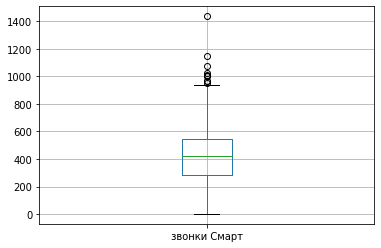

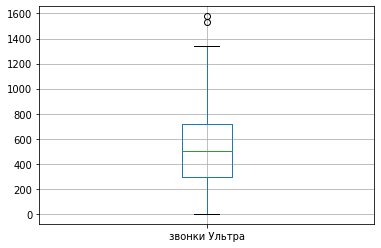

In [27]:
# выведем диаграммы размаха для двух наборов данных
# суммарная продолжительность звонков каждый месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'calls_duration', kind = 'box', grid = 'True',  \
                          label = 'звонки Смарт') \
                          #xlim = (0,600), ylim = (0,250))

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'calls_duration', kind = 'box', grid = 'True',  \
                          label = 'звонки Ультра') \
                          #xlim = (0,600), ylim = (0,250))

звонки Smart:
Дисперсия: 35702.04653099502
count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: calls_duration, dtype: float64 

звонки Ultra:
Дисперсия: 83144.408409935
count     947.000000
mean      517.013939
std       288.500085
min         0.100000
25%       294.400000
50%       498.950000
75%       715.605000
max      1578.060000
Name: calls_duration, dtype: float64


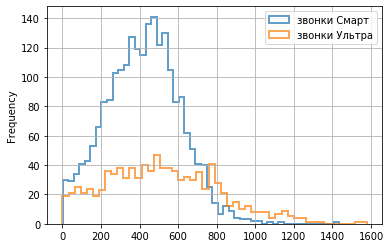

In [28]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'calls_duration', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'звонки Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'calls_duration', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'звонки Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))

print('звонки Smart:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "smart"')['calls_duration']))
print(user_monthly_overall.query('tariff == "smart"')['calls_duration'].describe(),'\n')

print('звонки Ultra:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "ultra"')['calls_duration']))
print(user_monthly_overall.query('tariff == "ultra"')['calls_duration'].describe())

Характеристики распределения для длительности звонков каждый месяц:

клиенты с тарифом Смарт:
- средняя продолжительность: 419 мин.;
- дисперсия: 35702 мин^2;
- стандартное отклонение: 189 мин.

клиенты с тарифом Ультра:
- средняя продолжительность: 517 мин.;
- дисперсия: 83144 мин^2;
- стандартное отклонение: 288 мин.

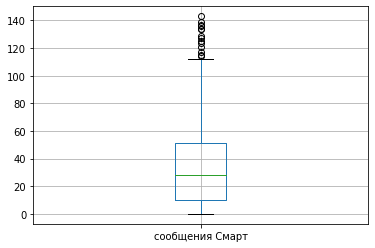

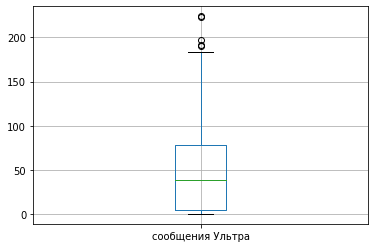

In [29]:
# выведем диаграммы размаха для двух наборов данных
# суммарное кол-во сообщений каждый месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'number_of_messages', kind = 'box', grid = 'True',  \
                          label = 'сообщения Смарт') \
                          #xlim = (0,600), ylim = (0,250))

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'number_of_messages', kind = 'box', grid = 'True',  \
                          label = 'сообщения Ультра') \
                          #xlim = (0,600), ylim = (0,250))

сообщения Smart:
Дисперсия: 798.8462060707005
count    2221.000000
mean       33.392166
std        28.270233
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: number_of_messages, dtype: float64 

сообщения Ultra:
Дисперсия: 2169.4330587672516
count    947.000000
mean      48.759240
std       46.601785
min        0.000000
25%        5.000000
50%       39.000000
75%       78.500000
max      224.000000
Name: number_of_messages, dtype: float64


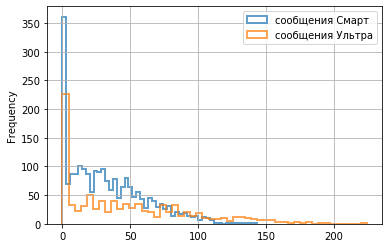

In [30]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'number_of_messages', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сообщения Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'number_of_messages', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сообщения Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))

print('сообщения Smart:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "smart"')['number_of_messages']))
print(user_monthly_overall.query('tariff == "smart"')['number_of_messages'].describe(),'\n')

print('сообщения Ultra:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "ultra"')['number_of_messages']))
print(user_monthly_overall.query('tariff == "ultra"')['number_of_messages'].describe())

Характеристики распределения для количества сообщений каждый месяц:

клиенты с тарифом Смарт:
- среднее количество: 33;
- дисперсия: 799;
- стандартное отклонение: 28.

клиенты с тарифом Ультра:
- среднее количество: 49;
- дисперсия: 2169;
- стандартное отклонение: 47.

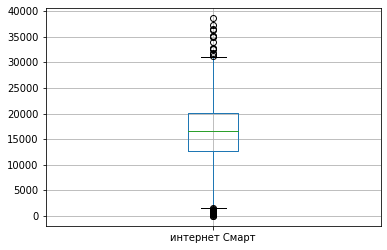

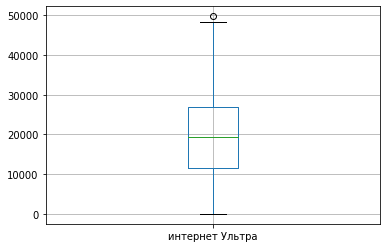

In [31]:
# выведем диаграммы размаха для двух наборов данных
# суммарный объём интернет-траффика каждый месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'traffic', kind = 'box', grid = 'True',  \
                          label = 'интернет Смарт') \
                          #xlim = (0,600), ylim = (0,250))

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'traffic', kind = 'box', grid = 'True',  \
                          label = 'интернет Ультра') \
                          #xlim = (0,600), ylim = (0,250))

интернет Smart:
Дисперсия: 34599364.84561494
count     2221.000000
mean     16231.462404
std       5883.447131
min          0.000000
25%      12672.000000
50%      16527.000000
75%      20068.000000
max      38610.000000
Name: traffic, dtype: float64 

интернет Ultra:
Дисперсия: 102465744.0285935
count      947.000000
mean     19471.580634
std      10127.885207
min          0.000000
25%      11623.240000
50%      19315.850000
75%      26838.070000
max      49745.690000
Name: traffic, dtype: float64


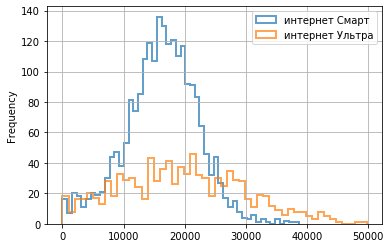

In [32]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'traffic', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'интернет Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'traffic', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'интернет Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))
print('интернет Smart:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "smart"')['traffic']))
print(user_monthly_overall.query('tariff == "smart"')['traffic'].describe(),'\n')

print('интернет Ultra:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "ultra"')['traffic']))
print(user_monthly_overall.query('tariff == "ultra"')['traffic'].describe())

Характеристики распределения для объёма интернет-трафика каждый месяц:

клиенты с тарифом Смарт:
- средний объём: 16230 Мб;
- дисперсия: 34599364 Мб^2;
- стандартное отклонение: 5.880 Мб.

клиенты с тарифом Ультра:
- средний объём: 19470 Мб;
- дисперсия: 102465744 Мб^2;
- стандартное отклонение: 10.130 Мб.

## 4. Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Рассмотрим распределение выручки каждый месяц для клиентов разных тарифов.

выручка Smart:
Дисперсия: 621610.241902527
count    2221.000000
mean     1234.467522
std       788.600182
min       550.000000
25%       550.000000
50%       961.093750
75%      1670.507812
max      6711.015625
Name: revenue, dtype: float64 

выручка Ultra:
Дисперсия: 128545.91555576792
count     947.000000
mean     2061.285818
std       358.722454
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4736.966309
Name: revenue, dtype: float64


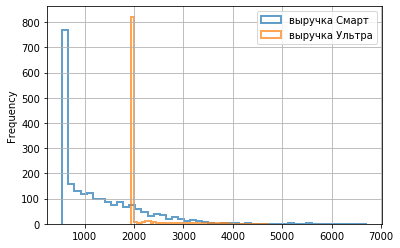

In [33]:
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))
print('выручка Smart:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "smart"')['revenue']))
print(user_monthly_overall.query('tariff == "smart"')['revenue'].describe(),'\n')

print('выручка Ultra:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "ultra"')['revenue']))
print(user_monthly_overall.query('tariff == "ultra"')['revenue'].describe())

Видим 2 выраженных пика на гистограмме в области ежемесячной абонентской платы (550р для тарифа Смарт и 1950р для тарифа Ультра). Средния значения ежемесячной выручки при этом существенно различаются (1230р и 2060р).

Сформулируем нулевую гипотезу:
"Средняя выручка пользователей тарифом Смарт и Ультра одинакова".

In [34]:
# зададим уровень статистической значимости в 5%
alpha = .05 

results = st.ttest_ind(
    user_monthly_overall.query('tariff == "smart"')['revenue'], 
    user_monthly_overall.query('tariff == "ultra"')['revenue'],
    equal_var = False)

print('p-значение:', results.pvalue)

p-значение: 1.215995009965387e-289


Получили значение уровня значимости значительно меньше 5% (вероятность равенства средней выручки разных тарифов примерно 0%). Отвергаем нулевую гипотезу. Делаем вывод о том, что средняя выручка отличается.

Рассмотрим объём выручки, который клиенты разных тарифов платят сверх абонентской платы каждый месяц.

Не знаю, насколько правильно так делать (если в расчете общей выручки допущена какая-то ошибка, то она дублируется и в расчет сверх выручки), но в этот раз упростил запись вот так:

In [35]:
# вычислим выручку с каждого пользователя сверх абонентской платы
def excess_revenue_calc(row):
    tariff = row['tariff']
    revenue = row['revenue']
    excess_revenue = 0
    if tariff == 'smart':
        return(revenue - smart_rub_monthly_fee)
    else:
        return(revenue - ultra_rub_monthly_fee)     

In [36]:
user_monthly_overall['excess_revenue'] = user_monthly_overall.apply(excess_revenue_calc, axis = 1)
user_monthly_overall.head(10)

city  number_of_calls  calls_duration tariff  \
user_id month                                                      
1000    5      Краснодар               17          150.06  ultra   
        6      Краснодар               28          158.90  ultra   
        7      Краснодар               41          318.80  ultra   
        8      Краснодар               42          389.87  ultra   
        9      Краснодар               46          440.14  ultra   
        10     Краснодар               44          328.45  ultra   
        11     Краснодар               37          319.04  ultra   
        12     Краснодар               38          312.98  ultra   
1001    11        Москва               45          430.00  smart   
        12        Москва               47          414.00  smart   

               number_of_messages   traffic     revenue  excess_revenue  
user_id month                                                            
1000    5                    22.0   2253.49  1950.00000         0.00000  
        6                    60.0  23233.77  1950.00000         0.00000  
        7                    75.0  14003.64  1950.00000         0.00000  
        8                    81.0  14055.93  1950.00000         0.00000  
        9                    57.0  14568.91  1950.00000         0.00000  
        10                   73.0  14702.49  1950.00000         0.00000  
        11                   58.0  14756.47  1950.00000         0.00000  
        12                   70.0   9817.61  1950.00000         0.00000  
1001    11                    0.0  18452.00  1153.90625       603.90625  
        12                    0.0  14053.00   550.00000         0.00000

сверх выручка Smart:
Дисперсия: 621610.241902527
count    2221.000000
mean      684.467522
std       788.600182
min         0.000000
25%         0.000000
50%       411.093750
75%      1120.507812
max      6161.015625
Name: excess_revenue, dtype: float64 

сверх выручка Ultra:
Дисперсия: 128545.91555576795
count     947.000000
mean      111.285818
std       358.722454
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2786.966309
Name: excess_revenue, dtype: float64


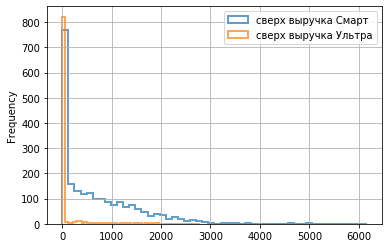

In [37]:
# рассмотрим распределение выручки каждый месяц (сверх абонентской платы) для клиентов разных тарифов
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'excess_revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сверх выручка Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'excess_revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сверх выручка Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))
print('сверх выручка Smart:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "smart"')['excess_revenue']))
print(user_monthly_overall.query('tariff == "smart"')['excess_revenue'].describe(),'\n')

print('сверх выручка Ultra:')
print('Дисперсия:',np.var(user_monthly_overall.query('tariff == "ultra"')['excess_revenue']))
print(user_monthly_overall.query('tariff == "ultra"')['excess_revenue'].describe())

Проверим гипотезу о равенстве средней выручки сверх размера абонентской платы для клиентов разных тарифов.

In [38]:
# зададим уровень статистической значимости в 5%
alpha = .05 

results = st.ttest_ind(
    user_monthly_overall.query('tariff == "smart"')['excess_revenue'], 
    user_monthly_overall.query('tariff == "ultra"')['excess_revenue'],
    equal_var = False)

print('p-значение:', results.pvalue)

p-значение: 2.6194862399306354e-155


Получили значение уровня значимости значительно меньше 5% (вероятность равенства средней выручки разных тарифов примерно 0%). Отвергаем нулевую гипотезу. Делаем вывод о том, что средняя выручка отличается.

Рассмотрим распределение средней выручки пользователей из Москвы и из других регионов. 

выручка Москва:
Дисперсия: 546239.5477627168
count     610.000000
mean     1506.262210
std       739.686753
min       550.000000
25%       733.197266
50%      1689.816406
75%      1950.000000
max      5186.429688
Name: revenue, dtype: float64 

выручка регионы:
Дисперсия: 634298.9845917724
count    2558.000000
mean     1475.750621
std       796.584615
min       550.000000
25%       679.025391
50%      1490.332031
75%      1950.000000
max      6711.015625
Name: revenue, dtype: float64


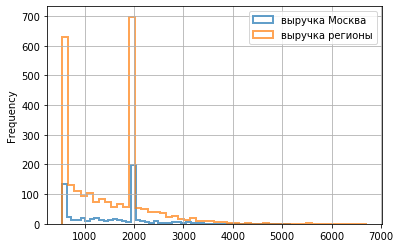

In [39]:
ax = user_monthly_overall.query('city == "Москва"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Москва',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('city != "Москва"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка регионы',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))
print('выручка Москва:')
print('Дисперсия:',np.var(user_monthly_overall.query('city == "Москва"')['revenue']))
print(user_monthly_overall.query('city == "Москва"')['revenue'].describe(),'\n')

print('выручка регионы:')
print('Дисперсия:',np.var(user_monthly_overall.query('city != "Москва"')['revenue']))
print(user_monthly_overall.query('city != "Москва"')['revenue'].describe())

Сформулируем нулевую гипотезу: "Средняя выручка пользователей из Москвы и из других регионов одинакова".

In [40]:
# зададим уровень статистической значимости в 5%
alpha = .05 

results = st.ttest_ind(
    user_monthly_overall.query('city == "Москва"')['revenue'], 
    user_monthly_overall.query('city != "Москва"')['revenue'])

print('p-значение:', results.pvalue)

p-значение: 0.38899332717001367


Уровень статистической значимости (38.9%) выше критического (5%), не можем отвергнуть гипотезу, делаем вывод о том, что средняя выручка клиентов из Москвы и из регионов не отличается.

## 5. Общий вывод

В результате анализа набора данных об активности клиентов оператора сотовой связи, получены средние значения выручки с пользователя за месяц. Для пользователей тарифа Смарт среднее значение выручки: 1234р, а для клиентов тарифа Ультра: 2061р. Проведя статистический анализ двух выборок, делаем вывод о том, что эти значения статистически различны, то есть не случайны.

Для пользователей из Москвы среднее значение выручки в месяц составляет 1506р, а для пользователей из регионов 1475р, в результате статистического анализа, обнаружено, что с вероятностью в 38.9% это отличие случайно, и среднее значение выручки одинаково для клиентов из Москвы и из регионов.